Library import

In [1]:
#library import
#using keras API in tensorfow library
#keras is a high level neural network API developed with a speciic goal to make it easier to build and train deep learning models.
#keras is an open source neural network library written in python that runs on top of tensorflow
#imported sequential class from tensorflow.keras.models
#most of the neural network that we work with are built with a sequential class
#so I will add different layers inside the seqeuntial class
#basically it's a prebuilt class model where one can just add layers
#Conv2D - is a layer used to extract features from the image
#convolution helps in sharpening its detection and other operations that can help the machine to learn characteristics of an image
#MaxPooling2D layer - helps to reduce the size of the data. In other words, reduces the image dimensionality without losing important features or patterns.
#Dropuot layer - drop out is done to reduce overfitting. So it drops off some of the neurons while learning the process.
#Flatten layer - transforms a two dimensional matrix or features into a vector that can be fed into a fully connected neural network classifier.
#flattening is converting data into a one dimensional array for inputing it into the next layer
#so this flattens the output of the convolution layers to create a single long feature vector
#Dense layer - is a classic fully connected neural network layer where each input node is connected to each output node
#So Conv2D will transform the input image into a very abstract representation
#and this representation can be used by densely connected layer to generate a classification
#As dense layers can only handle a dimensional data, one have to convert the multi-dimensional feature map output by the final Conv2D layer
#into one dimensional format first. One achieves this with the help of flatten layer.
#To compile the model one needs an optimizer. So we are making use of Adam optimizer imported from tensorflow.keras.optimizers
#ImageDataGenerator is then imported from tensorflow.keras.preprocessing.image
#ImageDataGenerator is used for image augmentation purpose
#Image augmentation is a technique in building CNN that can increase the size of the training set. 
#SO the idea is simple, just duplicate the images with some kind of variations so the model can learn from more examples
#numpy is imported for numerical analysis
#matplotlib is imported for data visualization purpose

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Downloaded data from https://www.kaggle.com/prithwirajmitra/covid-face-mask-detection-dataset
#uploaded the data on google drive
#mounted on google colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# ! unzip covid-face-mask-detection-dataset.zip

In [3]:
import os

In [5]:
#assigning variables for the directories
data_path = '/content/drive/MyDrive/New_Masks_Dataset'
trainset_path = os.path.join(data_path,'Train')
testset_path = os.path.join(data_path,'Test')
validset_path = os.path.join(data_path,'Validation')

trainset_mask_path = os.path.join(trainset_path,'Mask')
trainset_nomask_path = os.path.join(trainset_path,'Non Mask')


In [6]:

trainset_mask_names = os.listdir(trainset_mask_path)#list of mask images of the training set
print(trainset_mask_names[:10]) #to print list of 10 file names

trainset_nomask_names = os.listdir(trainset_nomask_path)#list of nomask images of the training set
print(trainset_nomask_names[:10]) #to print list of 10 file names

['0125.jpeg', '0063.jpg', '0112.png', '0126.jpg', '0066.jpg', '0027.jpg', '0055.jpg', '0150.jpg', '0170.jpg', '0113.jpg']
['106.jpg', '114.jpg', '102.jpg', '11.jpg', '120.jpg', '116.jpg', '108.jpg', '119.jpg', '112.jpg', '10.jpg']


Image Visualization

['/content/drive/MyDrive/New_Masks_Dataset/Train/Mask/0125.jpeg', '/content/drive/MyDrive/New_Masks_Dataset/Train/Mask/0063.jpg', '/content/drive/MyDrive/New_Masks_Dataset/Train/Mask/0112.png', '/content/drive/MyDrive/New_Masks_Dataset/Train/Mask/0126.jpg', '/content/drive/MyDrive/New_Masks_Dataset/Train/Mask/0066.jpg', '/content/drive/MyDrive/New_Masks_Dataset/Train/Mask/0027.jpg', '/content/drive/MyDrive/New_Masks_Dataset/Train/Mask/0055.jpg', '/content/drive/MyDrive/New_Masks_Dataset/Train/Mask/0150.jpg']
['/content/drive/MyDrive/New_Masks_Dataset/Train/Non Mask/106.jpg', '/content/drive/MyDrive/New_Masks_Dataset/Train/Non Mask/114.jpg', '/content/drive/MyDrive/New_Masks_Dataset/Train/Non Mask/102.jpg', '/content/drive/MyDrive/New_Masks_Dataset/Train/Non Mask/11.jpg', '/content/drive/MyDrive/New_Masks_Dataset/Train/Non Mask/120.jpg', '/content/drive/MyDrive/New_Masks_Dataset/Train/Non Mask/116.jpg', '/content/drive/MyDrive/New_Masks_Dataset/Train/Non Mask/108.jpg', '/content/drive/M

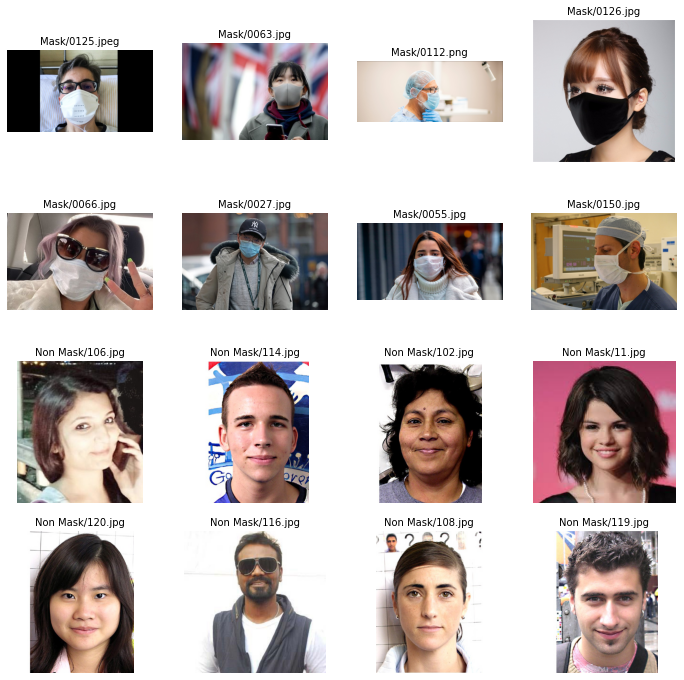

In [7]:
import matplotlib.image as mpimg
nrows = 4 #no of rows
ncols = 4 #no of cols
plt.figure(figsize=(12,12)) #specifying figure size

#iterating over mask filenames to get 8 images and storing in mask_img for visualization
mask_img = []
for i in trainset_mask_names[0:8]:
  mask_img.append(os.path.join(trainset_mask_path,i))

#iterating over nomask filenames to get 8 images and storing in nomask_img for visualization
nomask_img = []
for i in trainset_nomask_names[0:8]:
  nomask_img.append(os.path.join(trainset_nomask_path,i))

print(mask_img)
print(nomask_img)

#merging mask and nomask file lists
combined_imgs = mask_img+nomask_img 

for i in range(0,len(combined_imgs)):
  data = combined_imgs[i].split('/',6)[6] #splits the filepath to six parts and return the 6th part
  # print(data)
  sp = plt.subplot(nrows,ncols,i+1)
  sp.axis('Off')
  image = mpimg.imread(combined_imgs[i]) #to read the image data with imread function
  sp.set_title(data,fontsize=10) #set the title of the image
  plt.imshow(image,cmap='gray') #imshow function to draw the matplotlib image

plt.show() #to display the image



Data Augmentation

In [8]:
#Data Augmentation
#data that goes into the neuaral network should be normalised in some way
#to make it amendable to processing by the network
#in this case I need to process the images by normalizing the pixel values
#rescale=1./255, #rescale by the factor one by two hundred and fity five to normalize the pixel values
#zoom_range = 0.2 or 20% magnitude,#allows us to take some random crops of the images
#and those would be like one is zooming into some parts of the image and the magnitude is 20%
#rotation_range = 40,#to rotate the image by different angles;parameter is in degrees
trainset_datagen = ImageDataGenerator(rescale=1./255,
                                   zoom_range = 0.2,                              
                                   rotation_range = 40,
                                   horizontal_flip = True
                                   )
#also rescale for test and validation sets but without applying any augmentation 
#because validation and test sets act as the real world data
testset_datagen = ImageDataGenerator(rescale=1./255)
validset_datagen = ImageDataGenerator(rescale=1./255)


#invoking flow_from_directory method on trainset_datagen object to load the images from the trainset_path, testset_path,validset_path
#target_size is the size we want to rescale our images to
#trainset_path, #loads the images from trainset_path directory
#target_size=(150,150), #resizes the images to a constant of 150 by 150 size
#batch_size meaning how many images we will be feeding at once
#class_mode=binary because it's just two classes involved i.e mask and nomask class
trainset_generator = trainset_datagen.flow_from_directory(trainset_path, 
                                                    target_size=(150,150), 
                                                    batch_size = 32,
                                                    class_mode = 'binary'
                                                    )
testset_generator = testset_datagen.flow_from_directory(testset_path,
                                                    target_size=(150,150),
                                                    batch_size = 32,
                                                    class_mode = 'binary'
                                                    )
validset_generator = validset_datagen.flow_from_directory(validset_path,
                                                    target_size=(150,150),
                                                    batch_size = 32,
                                                    class_mode = 'binary'
                                                    )

Found 600 images belonging to 2 classes.
Found 100 images belonging to 2 classes.
Found 306 images belonging to 2 classes.


In [9]:
trainset_generator.class_indices #to know the classes it found. Output shows the classes have been labeled as mask and non mask

{'Mask': 0, 'Non Mask': 1}

In [10]:
#below shows the dimensions of the image 
#and 3 represents the channel i.e the image is of RGB type; 1 would represent gray scale
trainset_generator.image_shape

(150, 150, 3)

Building the Convolutional Neural Network

In [11]:
#using keras API to build the model
#we can introduce keras sequential class to build simple models
#most of the neural network can be built using the sequential class

#1st convolution layer
model = Sequential() #creates instance of the sequential class and that is to build the model in a sequential fashion
#next build our 1st convolution layer
model.add(Conv2D(32,(3,3),padding='SAME',activation='relu',input_shape=(150,150,3)))#no.of filter=32,filter size=3by3
#convolution layer is for searching and extracting features of the image. 
#Here we would extract 32 features from the images and to search for features, the size of the searching matrix is set to 3by3
#padding set to same  so as not to lose information in image
#relu so the network learns from more complex functions
model.add(MaxPooling2D(pool_size=(2,2)))#to reduce the image as we dont need all the data. we just need the features we want
model.add(Dropout(0.5))#drop 50% of the neurons to avoid overfitting the data

#2nd convolution layer
model.add(Conv2D(64,(3,3),padding='SAME',activation='relu'))#increase the feature extraction to 64 from 32
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

#flatten layer
model.add(Flatten())#to transform into one dimensional image

#dense layer
model.add(Dense(256,activation='relu'))#256 units is the amount of nodes
model.add(Dropout(0.5))

#output layer
model.add(Dense(1,activation='sigmoid'))#amount of nodes here is 1 unit since this is a binary classification
model.summary() #to get summary of the model

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 37, 37, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 87616)             0

- one can see summary of the model after running the above cell
- It can be noticed that the first dimension of every tensor/output shape have a value of none
- that's because the first dimension will always be the batch size
- the batch size is always flexible,one can pass any number of examples in a batch to the model
- so tensor flow represents the first dimension of the tensor shape with the value of none
- remembering that the input shape was 150 by 150 by 3
- after being processed by convolution layer, it becomes a tensor of shape 150 by 150 by 32; 32 because we created with 32 different filters
- 150 by 150 reoresents the size of the input image
- maxpooling layer has a 2 by 2 window, so that downsamples the input image from conv2d layer to 75 by 75 by 32 shape tensor
- output from dropout is passed to the next layer
- 64 was used as number of filters in 2nd conv layer
- then maxpooling layer again downsamples the input shape to 37 by 37 and 64 the number of filters
- the flatten layer just rolls the data into one dimensional vector (ie 37*37*64=87616)
- dense layer now has tensor shape of one dimension with becomes 256 units and the final dense layer with tensor shape of a single unit

Training and Evaluating performance of the model

In [12]:
#Train and Evaluate performance of the model

model.compile(Adam(lr=0.001),loss='binary_crossentropy',metrics=['accuracy'])#compiles the model

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


*Explaining:*
- The model can produce two graphs, Loss and Accuracy graphs
- If a CNN model achieves a high train accuracy but a very low validation accuracy,
- i.e., in Loss graph, training loss decreases and the validation loss increases or, in accuracy graph there is a wide gap between training accuracy and validation accuracy,
- then the above is a clear sign that the model is overfitting. It's learning the training data very well but fails to generalise the knowledge to the test data.
- The model is overfitted if there is a big gap between the training data and the validation data

In [15]:
#to train the model
history = model.fit(trainset_generator,#passing the trainset_generator to fit our train data to the model
                    epochs = 30,
                    validation_data = validset_generator)#then passing the validset_generator to validate all images of the validation set

#a single epoch is one single pass of all the data to the network

Epoch 1/30
19/19 [==============================] - 207s 10s/step - loss: 1.5452 - accuracy: 0.5500 - val_loss: 0.6614 - val_accuracy: 0.6765
Epoch 2/30
19/19 [==============================] - 16s 829ms/step - loss: 0.4635 - accuracy: 0.8033 - val_loss: 0.4220 - val_accuracy: 0.8007
Epoch 3/30
19/19 [==============================] - 16s 843ms/step - loss: 0.3351 - accuracy: 0.8767 - val_loss: 0.3507 - val_accuracy: 0.9118
Epoch 4/30
19/19 [==============================] - 16s 842ms/step - loss: 0.2947 - accuracy: 0.8983 - val_loss: 0.3501 - val_accuracy: 0.8987
Epoch 5/30
19/19 [==============================] - 15s 819ms/step - loss: 0.2490 - accuracy: 0.9133 - val_loss: 0.2627 - val_accuracy: 0.9216
Epoch 6/30
19/19 [==============================] - 15s 826ms/step - loss: 0.2514 - accuracy: 0.9033 - val_loss: 0.3361 - val_accuracy: 0.9118
Epoch 7/30
19/19 [==============================] - 16s 844ms/step - loss: 0.2344 - accuracy: 0.9233 - val_loss: 0.2482 - val_accuracy: 0.9183


In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Text(0.5, 0, 'epoch')

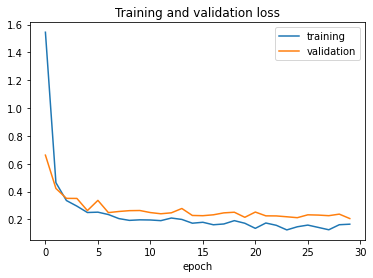

In [16]:
#Graph between the training and the validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training','validation'])
plt.title('Training and validation loss')
plt.xlabel('epoch')

- In the above graph with every epoch loss is going down
- The data is fitted well, keeping both the training and the validation loss at a minimum

Text(0.5, 0, 'epoch')

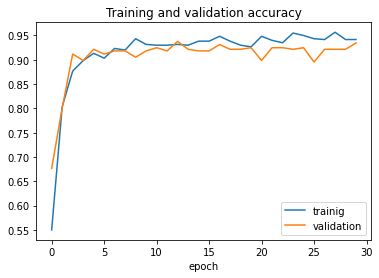

In [17]:
#Graph between the training and the validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['trainig','validation'])
plt.title('Training and validation accuracy')
plt.xlabel('epoch')

- Above graph shows training accuracy is around 92% and validation accuracy 90%
- Accuracy has increased over the number of epochs
- No big gap between validation and training accuracy

In [19]:
#To check test loss and accuracy
test_loss , test_acc = model.evaluate(testset_generator)
print('test acc :{} test loss:{}'.format(test_acc,test_loss))

4/4 [==============================] - 15s 5s/step - loss: 0.1911 - accuracy: 0.9100
test acc :0.9100000262260437 test loss:0.19111892580986023


- the test is to see what our model is doing on our testing data
- testing data is the data that our model has never seen during our training process
-  the test accuracy is 91%

In [ ]:
#Use of trained model to detect face masks on the static images

import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()
for fname in uploaded.keys():
  img_path='/content/'+fname
  img = image.load_img(img_path , target_size=(150,150))
  images = image.img_to_array(img)
  images=np.expand_dims(images,axis=0)
  prediction = model.predict(images) #using the trained model to predict uploaded images
  print(fname)
  if prediction==0:
    print('mask')
  else:
    print('nomask')

Saving 1.jpg to 1.jpg
Saving A.jpg to A.jpg
1.jpg
mask
A.jpg
nomask


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
model.save('model.h5') # to save the model